0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


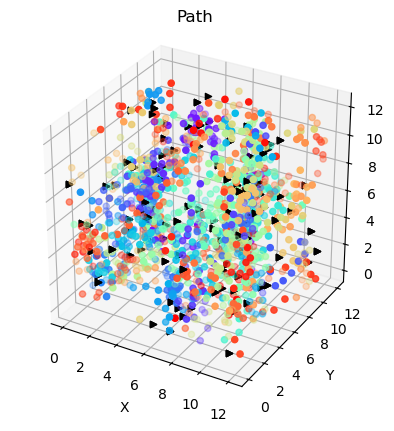

In [1]:
import numpy as np
import pandas as pd
from file_functions import load_files, write_lammps_data
from beads_from_edge_3d import create_atom_list, create_chains

STUDY_NAME = '20241016B1C1'
COORDS = ['x', 'y', 'z']

[NodeData, Edges, PB_edges, BOX_SIZE, LENGTH_OF_CHAIN] = load_files(STUDY_NAME, COORDS)
FullEdges = np.concatenate((Edges, PB_edges))
BeadData = create_atom_list(NodeData, FullEdges, LENGTH_OF_CHAIN)
BondData = pd.DataFrame(columns=["BondType", "Atom1", "Atom2"], dtype="int")
BeadData, BondData, runInfo = create_chains(FullEdges, BondData, BeadData,
                                            NodeData, BOX_SIZE, LENGTH_OF_CHAIN)
write_lammps_data(STUDY_NAME, BeadData, BondData, BOX_SIZE)


In [ ]:
from beads_from_edge_3d import load_files

STUDY_NAME = '20241016A1C1'
COORDS = ['x', 'y']
[NodeData, Edges, PB_edges, BOX_SIZE, LENGTH_OF_CHAIN] = load_files(STUDY_NAME, COORDS)

array([[56.2353827 , 17.70510707,  1.        ],
       [92.12038532, 15.13577736,  1.        ],
       [28.26016223, 39.05159587,  1.        ],
       [85.8498365 , 88.2316419 ,  1.        ],
       [91.12937551, 29.65631003,  1.        ],
       [73.89356652, 51.26745138,  1.        ],
       [40.21135022, 39.08428601,  1.        ],
       [23.18961412, 32.2562669 ,  1.        ],
       [64.15130546, 24.22718328,  1.        ],
       [34.18866854, 18.30799989,  1.        ],
       [59.22297034, 22.00301732,  1.        ],
       [ 4.43029096, 66.26329678,  1.        ],
       [68.53807184, 66.89903853,  1.        ],
       [36.60811685, 76.50589196,  1.        ],
       [75.26084138, 46.63629963,  1.        ],
       [87.81956426, 36.71761899,  1.        ],
       [61.06234263, 26.64192479,  1.        ],
       [10.88576617, 49.22622321,  1.        ],
       [32.30959593, 93.51140052,  1.        ],
       [15.38079644, 49.80761491,  1.        ],
       [84.04254106, 28.95306221,  1.   

## Test Zone

In [14]:
import numpy as np

BOX_SIZE = 10
start = np.asarray([1, 3, 9])
end = np.asarray([2, 5, 2])

raw_diff = np.abs(end - start)
wrap_diff = np.abs(BOX_SIZE - raw_diff)
print(raw_diff, wrap_diff)
dx, dy, dz = np.minimum(raw_diff, wrap_diff)
print(dx, dy, dz)
np.where(raw_diff < wrap_diff, end, start + wrap_diff)

[1 2 7] [9 8 3]
1 2 3


array([ 2,  5, 12])